# STA 663 Midterm Exams

Please observe the Duke honor code for this **closed book** exam.

**Permitted exceptions to the closed book rule**

- You may use any of the links accessible from the Help Menu for reference - that is, you may follow a chain of clicks from the landing pages of the sites accessible through the Help Menu. If you find yourself outside the help/reference pages of `python`, `ipython`, `numpy`, `scipy`, `matplotlib`, `sympy`, `pandas`, (e.g. on a Google search page or stackoverflow or current/past versions of the STA 663 notes) you are in danger of violating the honor code and should exit immediately.

- You may also use TAB or SHIFT-TAB completion, as well as `?foo`, `foo?` and `help(foo)` for any function, method or class `foo`.

The total points allocated is 125, but the maximum possible is 100. Hence it is possible to score 100 even with some errors or incomplete solutions.

## Imports

All the necessary packages have been imported for you in the Code cells below. You should not need any additional imports.

In [1]:
%matplotlib inline
import  matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.linalg as la
from collections import Counter
from functools import reduce

In [2]:
%load_ext rpy2.ipython

**1**. (10 points)

Read the flights data at https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv into a `pnadas` data frame. Find the average number of passengers per quarter (Q1, Q2, Q3,Q4) across the years 1950-1959 (inclusive of 1950 and 1959), where

- Q1 = Jan, Feb, Mar
- Q2 = Apr, May, Jun
- Q3 = Jul, Aug, Sep
- Q4 = Oct, Nov, Dec

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv')
data.head(3)
data1 = data[(data.year>=1950) & (data.year<=1959)]

Q1_mean = data1[data1.month.isin(['January','February','March'])].passengers.mean()
Q2_mean = data1[data1.month.isin(['April','May','June'])].passengers.mean()
Q3_mean = data1[data1.month.isin(['July','August','September'])].passengers.mean()
Q4_mean = data1[data1.month.isin(['October','November','December'])].passengers.mean()

In [4]:
print(Q1_mean,Q2_mean,Q3_mean,Q4_mean)

245.8 278.46666666666664 329.6666666666667 250.36666666666667


**2**. (10 points)

The Collatz sequence is defined by the following rules for finding the next number

```
if the current number is even, divide by 2
if the current number is odd, multiply by 3 and add 1
if the current number is 1, stop
```

- Find the starting integer that gives the longest Collatz sequence for integers in the range(1, 10000). What is the starting number and length of this Collatz sequence?

In [5]:
def collatz(start):
    length = 1
    while start != 1:
        if start%2 == 0:
            start = start//2
        else:
            start = 3*start+1
        length += 1
    return length

[(i,collatz(i)) for i in range(1,10000)]
start, max_len = max([(i,collatz(i)) for i in range(1,10000)], key= lambda x: x[1])
print(start,max_len)

6171 262


**3**. (10 points)

Recall that a covariance matrix is a matrix whose entries are

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/4df2969e65403dd04f2c64137d21ff59b5f54190)

Find the sample covariance matrix of the 4 features of the **iris** data set at http://bit.ly/2ow0oJO using basic `numpy` operations on `ndarrasy`. Do **not** use the `np.cov` or equivalent functions in `pandas` (except for checking). Remember to scale by $1/(n-1)$ for the sample covariance.

In [6]:
iris = pd.read_csv('http://bit.ly/2ow0oJO')
iris_mat = iris.loc[:,'sepal_length':'petal_width'].as_matrix()
n = len(iris_mat)
tmp = iris_mat - iris_mat.mean(axis=0)
iris_cov = (tmp.T @ tmp)/(n-1)

In [7]:
iris_cov

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

**4**. (10 points)

How many numbers in `range(100, 1000)` are divisible by 17 after you square them and add 1? Find this out using only **lambda** functions, **map**, **filter** and **reduce** on `xs`, where `xs = range(100, 10000)`.

In pseudo-code, you want to achieve

```python
xs = range(100, 10000)
count(y for y in (x**2 + 1 for x in xs) if y % 17 == 0)
```

In [8]:
xs = range(100, 10000)
reduce(lambda x,y: x+y, filter(lambda x: x==1, map(lambda x: 1-(x**2+1)%17, xs)))

1164

**5**. (20 points)

- Given the DNA sequence below, create a $4 \times 4$ transition matrix $A$ where $A[i,j]$ is the probability of the base $j$ appearing immediately after base $i$. Note that a *base* is one of the four letters `a`, `c`, `t` or `g`. The letters below should be treated as a single sequence, broken into separate lines just for formatting purposes. You should check that row probabilities sum to 1. (10 points)
- Find the steady state distribution of the 4 bases from the row stochastic transition matrix - that is the, the values of $x$ for which $x^TA = x$. Find the solution by solving a set of linear equations. Hint: you need to add a constraint on the values of $x$. Only partial credit will be given for other methods of finding the steady state distribution. (10 points)

```
gggttgtatgtcacttgagcctgtgcggacgagtgacacttgggacgtgaacagcggcggccgatacgttctctaagatc
ctctcccatgggcctggtctgtatggctttcttgttgtgggggcggagaggcagcgagtgggtgtacattaagcatggcc
accaccatgtggagcgtggcgtggtcgcggagttggcagggtttttgggggtggggagccggttcaggtattccctccgc
gtttctgtcgggtaggggggcttctcgtaagggattgctgcggccgggttctctgggccgtgatgactgcaggtgccatg
gaggcggtttggggggcccccggaagtctagcgggatcgggcttcgtttgtggaggagggggcgagtgcggaggtgttct
```

**Part 1**

In [9]:
dna = '''gggttgtatgtcacttgagcctgtgcggacgagtgacacttgggacgtgaacagcggcggccgatacgttctctaagatc
ctctcccatgggcctggtctgtatggctttcttgttgtgggggcggagaggcagcgagtgggtgtacattaagcatggcc
accaccatgtggagcgtggcgtggtcgcggagttggcagggtttttgggggtggggagccggttcaggtattccctccgc
gtttctgtcgggtaggggggcttctcgtaagggattgctgcggccgggttctctgggccgtgatgactgcaggtgccatg
gaggcggtttggggggcccccggaagtctagcgggatcgggcttcgtttgtggaggagggggcgagtgcggaggtgttct'''

dna = ''.join(dna.splitlines())
count = Counter(zip(dna, dna[1:]))
base = ['a','c','t','g']
tran_mat = np.array([[count[(i,j)] for j in base] for i in base])
tran_mat = tran_mat/ tran_mat.sum(axis=1).reshape(-1,1)
print(tran_mat, '\n', tran_mat.sum(axis=1))

[[ 0.09433962  0.20754717  0.24528302  0.45283019]
 [ 0.16666667  0.23809524  0.26190476  0.33333333]
 [ 0.10204082  0.2244898   0.2755102   0.39795918]
 [ 0.14634146  0.18902439  0.22560976  0.43902439]] 
 [ 1.  1.  1.  1.]


**Part 2**

In [10]:
n = len(base)
M = np.r_[tran_mat.T-np.eye(n), [[1]*n]]
b = np.r_[[0]*n,1].reshape(-1,1)
steady,_,_,_ = la.lstsq(M, b)

In [11]:
steady

array([[ 0.1327228 ],
       [ 0.21062262],
       [ 0.24825335],
       [ 0.40840123]])

**6**. (10 points)

- Find the matrix $A$ that results in rotating the standard vectors in $\mathbb{R}^2$ by 30 degrees counter-clockwise and stretches $e_1$ by a factor of 3 and contracts $e_2$ by a factor of $0.5$. 
- What is the inverse of this matrix? How you find the inverse should reflect your understanding.

The effects of the matrix $A$ and $A^{-1}$ are shown in the figure below:

![image](./vecs.png)

In [12]:
rotate = np.array([[np.sqrt(3)/2, -1/2],[1/2, np.sqrt(3)/2]])
scale = np.diag([3,0.5])
A = scale @ rotate
A

array([[ 2.59807621, -1.5       ],
       [ 0.25      ,  0.4330127 ]])

In [13]:
A_inv = rotate.T @ np.diag([1/3,2])
A_inv

array([[ 0.28867513,  1.        ],
       [-0.16666667,  1.73205081]])

**7**. (55 points) 

We observe some data points $(x_i, y_i)$, and believe that an appropriate model for the data is that

$$
f(x) = ax^2 + bx^3 + c\sin{x}
$$

with some added noise. Find optimal values of the parameters $\beta = (a, b, c)$ that minimize $\Vert y - f(x) \Vert^2$

1. using `scipy.linalg.lstsq` (10 points)
2. solving the normal equations $X^TX \beta = X^Ty$ (10 points)
3. using `scipy.linalg.svd` (10 points)
4. using gradient descent with RMSProp (no bias correction) and starting with an initial value of $\beta = \begin{bmatrix}1 & 1 & 1\end{bmatrix}$. Use a learning rate of 0.01 and 10,000 iterations, and set the $\beta$ parameter of RMSprop to be 0.9 (this is a different $\beta$ from the parameters of the function we are minimizing). Running gradient descent should take a few seconds to complete. (25 points)

In each case, plot the data and fitted curve using `matplotlib`.

Data
```
x = array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])
```

### Using `lstsq`

In [14]:
x = np.array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = np.array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ]).reshape(-1,1)
X = np.c_[x**2, x**3, np.sin(x)]
beta1,_,_,_ = la.lstsq(X,y)
beta1

array([[  2.99259014],
       [ -0.19883227],
       [ 10.20024689]])

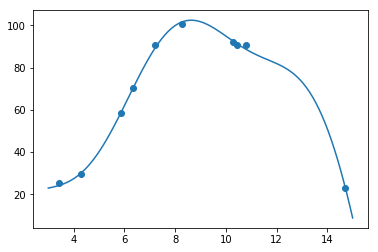

In [15]:
xp = np.linspace(3,15,100)
yp = np.c_[xp**2, xp**3, np.sin(xp)]@beta1
plt.scatter(x, y)
plt.plot(xp,yp)
pass

### Using normal equations

In [16]:
beta2 = la.solve(X.T@X, X.T@y)
beta2

array([[  2.99259014],
       [ -0.19883227],
       [ 10.20024689]])

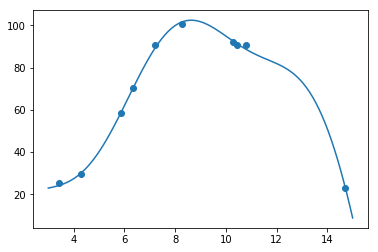

In [17]:
xp = np.linspace(3,15,100)
yp = np.c_[xp**2, xp**3, np.sin(xp)]@beta2
plt.scatter(x, y)
plt.plot(xp,yp)
pass

### Using SVD

In [18]:
U,s,Vt = la.svd(X)
k = len(s)
beta3 = Vt.T@np.diag(1/s)@U[:,:k].T@y
beta3

array([[  2.99259014],
       [ -0.19883227],
       [ 10.20024689]])

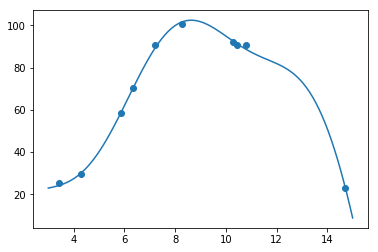

In [19]:
xp = np.linspace(3,15,100)
yp = np.c_[xp**2, xp**3, np.sin(xp)]@beta3
plt.scatter(x, y)
plt.plot(xp,yp)
pass

### Using Gradient descent with RMSprop

In [20]:
def grad_f(X, y, beta):
    return 2*X.T@(X@beta-y)

def rmsprop_gd(beta0, X, y, grad_f, lr=0.01, max_itr=10000, beta_rms=0.9):
    sln = beta0
    grad_sqravg = 0
    for i in range(max_itr):
        grad = grad_f(X, y, sln)
        grad_sqravg = beta_rms*grad_sqravg + (1-beta_rms)*grad**2
        sln = sln - lr * grad / np.sqrt(grad_sqravg)
    return sln

beta0 = np.array([1,1,1]).reshape(-1,1)
beta4 = rmsprop_gd(beta0, X, y, grad_f)
beta4

array([[  2.99759014],
       [ -0.19383227],
       [ 10.20524689]])

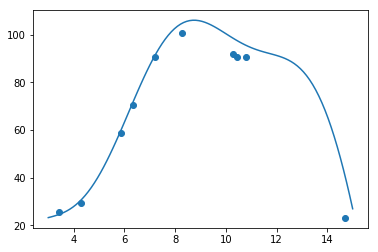

In [21]:
xp = np.linspace(3,15,100)
yp = np.c_[xp**2, xp**3, np.sin(xp)]@beta4
plt.scatter(x, y)
plt.plot(xp,yp)
pass